# Libraries

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [109]:
from sklearn.preprocessing import StandardScaler

# Load and Explore Data

In [82]:
df = pd.read_csv('./lessons/lesson-02/assets/dataset/titanic.csv')

In [3]:
df.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Rood, Mr. Hugh Roscoe",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


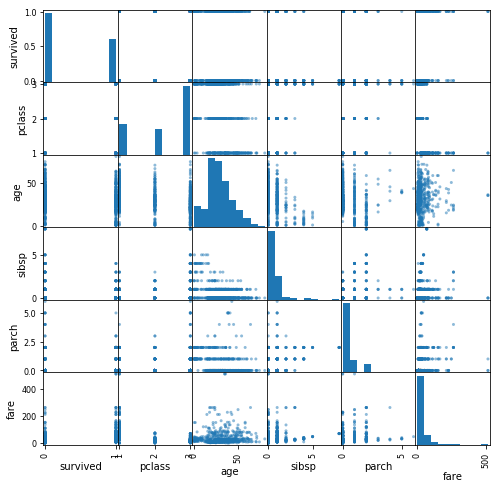

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(8, 8));

| Variable | Definition |
| --- | --- |
| survived | Titanic survival: 1=survived, 0=died |
| pclass | Ticket class (1, 2, 3) |
| sex | Sex (male, female) |
| age | Age (float; decimals for infants and a few adult half-years) |
| sibsp | # siblings/spouses on board |
| parch | # parents/children on board |
| ticket | Ticket number |
| fare | Passenger fare in pounds |
| cabin | Cabin number |
| embarked | Port of embarcation (C = Cherbourg, Q = Queenstown, S = Southampton) |

# Problem statement
With the above passenger data, can we predict whether a passenger survived the Titanic crash? Can we classify with better precision and accuracy than the mean survival rate?

# Data cleaning
Sex can be redefined as female = 1, male = 0. Port of embarcation and classes can be coded with dummies. Missing age values can be filled with the mean age.

In [83]:
#dummies for sex
df['female'] = pd.get_dummies(df['sex']).female

In [84]:
#dummies for port
df['cherbourg'] = pd.get_dummies(df['embarked']).C
df['southampton'] = pd.get_dummies(df['embarked']).S

In [79]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,surname,female,cherbourg,southampton
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0,0,1


In [86]:
#dummies for class
classes = pd.get_dummies(df['pclass'], drop_first=True)
df = df.join(classes)

In [89]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,female,cherbourg,southampton,2,3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [108]:
#fill missing age values with mean age
df['age'] = df['age'].fillna(df['age'].mean())

## Transform and Split
Transform using StandardScaler. Split using train_test_split

In [110]:
X = df[['age', 'sibsp', 'parch', 'fare', 'female', 'cherbourg', 'southampton', 2, 3]]
y = df['survived']
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(Xscale, y)

## Train with cross validation
Train a logistic regression model using cross-validation

In [114]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [115]:
lr = LogisticRegression()

In [116]:
predictions = cross_val_predict(lr, X_train, y_train, cv = 5)

In [118]:
print(metrics.accuracy_score(y_train, predictions))

0.8053892215568862


In [119]:
print(metrics.classification_report(y_train, predictions))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       407
          1       0.78      0.69      0.74       261

avg / total       0.80      0.81      0.80       668



## Compare with Dummy Classifier

In [120]:
from sklearn.dummy import DummyClassifier

In [121]:
dummy = DummyClassifier()

In [125]:
dpred = cross_val_predict(dummy, X_train, y_train, cv = 5)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [126]:
print(metrics.accuracy_score(y_train, dpred))

0.5449101796407185


In [127]:
print(metrics.classification_report(y_train, dpred))

             precision    recall  f1-score   support

          0       0.62      0.64      0.63       407
          1       0.42      0.40      0.41       261

avg / total       0.54      0.54      0.54       668



Accuracy score shows 81% of samples were correctly identified, compared with 54% in the Dummy Classifier model.

82% of passengers predicted to have died were correct, and 78% of passengers predicted to have survived were correct. Among those who died, 88% were correctly identified. Among those who survived, 69% were correctly identified. 

Compare this with the DummyClassifier results of 62% and 42%, and 64% and 40%, respectively. 

Harmonic means were .84 and .75, compared with dummy results of .63 and .41

The Logistic Regression model is more accurate in the training set.

## Use the Test Set

In [129]:
lr = LogisticRegression()
test_pred = cross_val_predict(lr, X_test, y_test, cv=5)
print(metrics.accuracy_score(y_test, test_pred))

0.7757847533632287


In [130]:
print(metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       142
          1       0.70      0.67      0.68        81

avg / total       0.77      0.78      0.77       223



Accuracy score shows that 78% of samples were correctly identified. Precision of predicted deaths remained the same. Recall decreased slightly for both outcomes, and precision of survivors decreased slightly more. All metrics continued to outperform the Dummy Classifier.

In [131]:
from sklearn.metrics import precision_recall_curve

In [136]:
lr.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
lr.score(X_test, y_test)

0.8161434977578476

In [138]:
y_scores = lr.decision_function(X_test)

In [139]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

Text(0.5,1,'Precision vs. Recall')

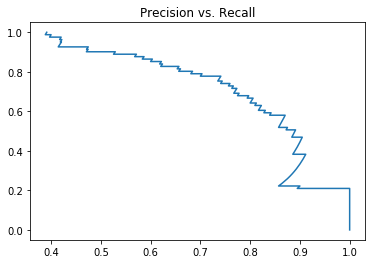

In [140]:
plt.plot(precision, recall)
plt.title("Precision vs. Recall")

In [99]:
#create linear regression model for age
X = df.dropna(subset=['age'])
y = X.age
X = X[['sibsp', 'parch', 'fare', 'female', 'cherbourg', 'southampton', 2, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
lr.score(X_train,y_train)

0.2546736778824945

In [104]:
predictions = lr.predict(X_train)

In [107]:
y_train.mean()

29.932242990654206

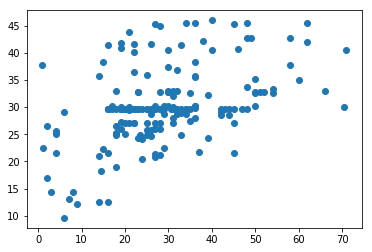

In [105]:
plt.scatter(y_train, predictions)

In [ ]:
Xna = df[]

In [94]:
lr.score(X_test,y_test)

1.0

In [61]:
df[df['parch'] < 3].groupby('age').size()

age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    16
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    11
45.50     2
46.00     3
47.00     9
48.00     8
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     7
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     1
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Length: 88, dtype: int64

In [55]:
df['surname'] = df['name'].str.split(',').str[0]

In [60]:
df.groupby(['surname']).size()

surname
Abbing              1
Abbott              2
Abelson             2
Adahl               1
Adams               1
Ahlin               1
Aks                 1
Albimona            1
Alexander           1
Alhomaki            1
Ali                 2
Allen               2
Allison             3
Allum               1
Andersen-Jensen     1
Anderson            1
Andersson           9
Andreasson          1
Andrew              1
Andrews             2
Angle               1
Appleton            1
Arnold-Franchi      2
Artagaveytia        1
Asim                1
Asplund             4
Astor               1
Attalah             2
Aubart              1
Augustsson          1
                   ..
Wells               1
West                3
Wheadon             1
White               2
Wick                2
Widegren            1
Widener             1
Wiklund             1
Wilhelms            1
Willey              1
Williams            4
Williams-Lambert    1
Windelov            1
Wiseman             1
Wo

In [43]:
df[df['age'] == 16]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
156,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
208,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
220,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
266,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
333,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S


In [40]:
df[df['age'] < 18].groupby(['sex', 'pclass']).survived.mean()

sex     pclass
female  1         0.875000
        2         1.000000
        3         0.542857
male    1         1.000000
        2         0.818182
        3         0.232558
Name: survived, dtype: float64

In [37]:
df[(df['age'] < 16) & (df['age'] > 10)]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
59,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
111,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
125,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
352,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
435,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
446,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S


In [ ]:
0   .705
5   .35
10  .579
15  .34
20  .344
25  .382
30  .47
35  .406
40  .347
45  .41
50  .4
55  .38
60  .286
65  0
70  0
75  1
